In [3]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random
import seaborn as sns
import wandb

In [ ]:
api = wandb.Api()
run = api.run("/varadi-epfl/ICL/runs/38pm2nxo")

h = run.scan_history()

In [10]:
ungiram = run.summary["unigram"]
bigram = run.summary["bigram"]
trigram = run.summary["trigram"]
bayes = run.summary["bayes"]

In [11]:
losses = [row["loss"] for row in h]
bayes = [row["bayes"] for row in h]
unigram = [row["unigram"] for row in h]
bigram = [row["bigram"] for row in h]
trigram = [row["trigram"] for row in h]


In [60]:
custom_CMAP = sns.cubehelix_palette(8, start=0.5, rot=-0.75, as_cmap=True, reverse=True)
colors = custom_CMAP(jnp.linspace(0, 1, 7))

def plot_losses(
    test_losses,
    bayes,
    save_every,
    fontsize=20,
    unigram=None,
    bigram=None,
    trigram=None,
):
    fig = plt.figure(figsize=(12, 6))
    plt.plot(jnp.arange(len(test_losses)) * save_every, jnp.array(test_losses), c=colors[0], linewidth=5 )

    if unigram is not None:
        plt.axhline(unigram, c=colors[6], ls="--", label="Unigram", linewidth=3 )
    if bigram is not None:
        plt.axhline(bigram[0], c=colors[5], ls="--", label="Bigram", linewidth=3 )
    if trigram is not None:
        plt.axhline(trigram[0], c=colors[4], ls="--", label="Trigram", linewidth=3 )
        plt.axhline(bayes[0], c=colors[3], ls="--", label="4-gram", linewidth=3 )
    else:
        plt.axhline(bayes, c=colors[3], ls="--", label="Trigram", linewidth=3 )

    plt.plot(jnp.arange(len(test_losses)) * save_every, jnp.array(test_losses), c=colors[0], linewidth=5 )


    plt.legend(fontsize=fontsize * 0.8, loc = (0.025,0.085))
    sns.despine()
    plt.xlabel("Step", fontsize=fontsize)
    plt.ylabel("Test Loss", fontsize=fontsize)
    plt.xlim(-100, 6000)
    plt.yticks(fontsize=fontsize * 0.8)
    plt.xticks(fontsize=fontsize * 0.8)
    plt.savefig("loss1.png", bbox_inches="tight")
    return fig

<ipython-input-60-b33c30a48940>:14: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  plt.plot(jnp.arange(len(test_losses)) * save_every, jnp.array(test_losses), c=colors[0], linewidth=5 )
<ipython-input-60-b33c30a48940>:26: FutureWarning: None encountered in jnp.array(); this is currently treated as NaN. In the future this will result in an error.
  plt.plot(jnp.arange(len(test_losses)) * save_every, jnp.array(test_losses), c=colors[0], linewidth=5 )


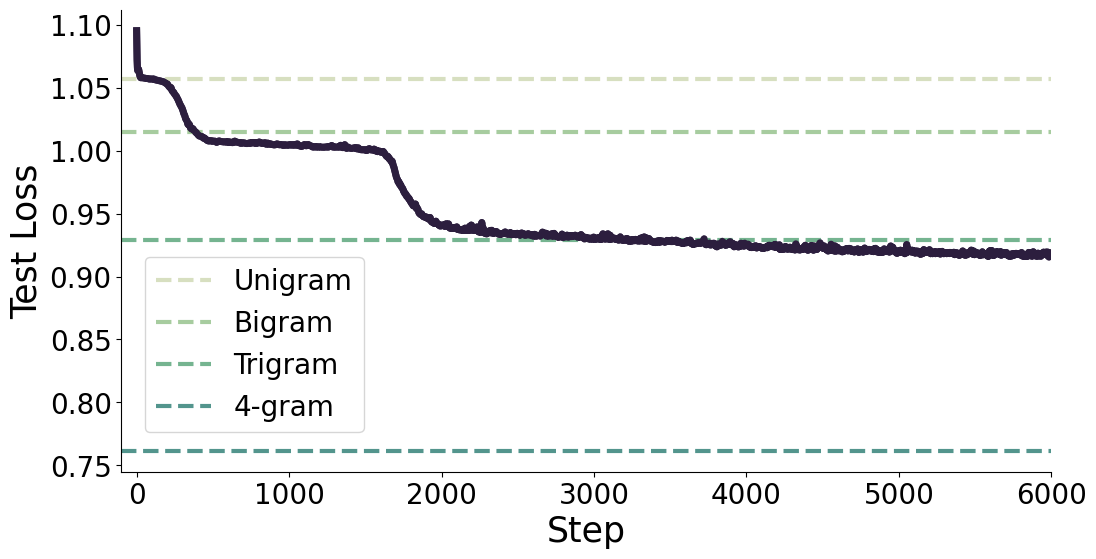

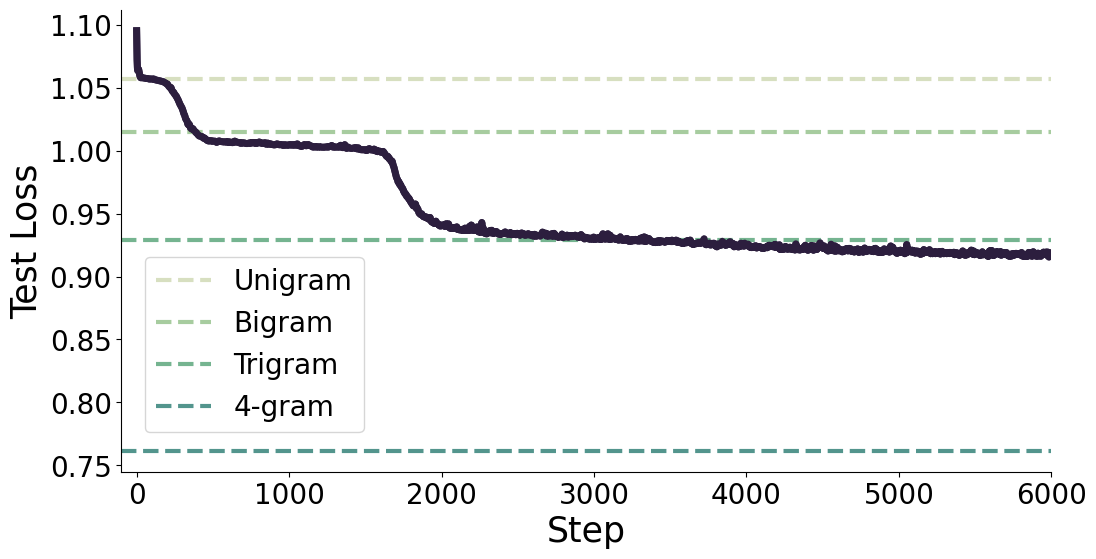

In [61]:
plot_losses(losses, bayes, save_every =1, unigram = ungiram, bigram=bigram, trigram=trigram, fontsize = 25)